In [1]:
import os
import imageio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split



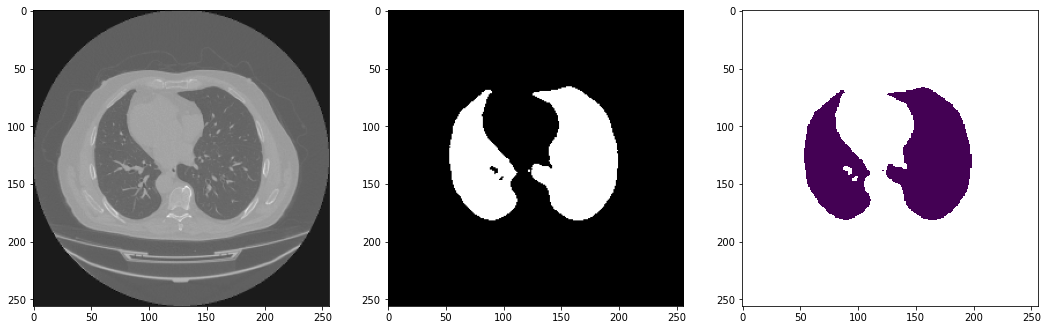

In [12]:
IMAGE_LIB = './ds_lungseg/images/'
MASK_LIB = './ds_lungseg/masks/'
SYNTH_LIB = './ds_lungseg/synvesmasks/'
IMG_HEIGHT, IMG_WIDTH = 256, 256

all_images = ['p012_z172.png']

x_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i, name in enumerate(all_images):
    im = cv2.imread(IMAGE_LIB + name, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')
    #im = cv2.imread(IMAGE_LIB + name, cv2.IMREAD_UNCHANGED).astype('float32')/255.
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_data[i] = im

y_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
for i, name in enumerate(all_images):
    im = cv2.imread(MASK_LIB + name, cv2.IMREAD_UNCHANGED).astype('float32')/255.
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST)
    y_data[i] = im

    
imgsrc = x_data[0]
lungmask = y_data[0]

fig, ax = plt.subplots(1,3, figsize = (18,9))
ax[0].imshow(imgsrc, cmap='gray')
ax[1].imshow(lungmask, cmap='gray')

    
imginverted = cv2.bitwise_not(lungmask)

ax[2].imshow(imginverted)


plt.show()

VASCUS WORK

In [40]:

VASCUS_LIB1 = './vascus/s1/original_image/'
VASCUS_LIB2 = './vascus/s2/original_image/'
VASCUS_LIB3 = './vascus/s3/original_image/'

SYNTH_IMAGE_LIB = './vascus/synimages/'
SYNTH_MASK_LIB = './vascus/synmasks/'

VASCUS_HEIGHT, VASCUS_WIDTH = 64, 64

In [41]:
#makes 2-color mask
def makeMaskFromImage(imgsrc,h,w):
    imgres = imgsrc.copy()
    for x in range(0,h):# process all pixels
        for y in range(0,w):
            imgres[x,y]=0
            if (imgsrc[x, y] >= 10 ):
                imgres[x,y]=255
    return imgres

In [42]:
all_vascus = [VASCUS_LIB1 + x for x in sorted(os.listdir(VASCUS_LIB1)) if x[-4:] == '.jpg']
all_vascus += [VASCUS_LIB2 + x for x in sorted(os.listdir(VASCUS_LIB2)) if x[-4:] == '.jpg']
all_vascus += [VASCUS_LIB3 + x for x in sorted(os.listdir(VASCUS_LIB3)) if x[-4:] == '.jpg']

vascus_data = np.empty((len(all_vascus), VASCUS_HEIGHT, VASCUS_WIDTH), dtype='float32')
for i, name in enumerate(all_vascus):
    #print(VASCUS_LIB1 + name)
    #im = cv2.imread(name, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')/255.
    im = cv2.imread(name, cv2.IMREAD_UNCHANGED).astype("uint8")
    im = cv2.resize(im, dsize=(VASCUS_WIDTH, VASCUS_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    diff = np.max(im) - np.min(im)
    
    #We dont want to take blank images!!
    if(diff>0):
        #im = (im - np.min(im)) / (np.max(im) - np.min(im))
        vascus_data[i] = im
    
        if(i>99):
            fname = ""+str(i);
        elif(i>10):
            fname = "0"+str(i);
        else:
            fname = "00"+str(i);
    
        imageio.imwrite(SYNTH_IMAGE_LIB+fname+".png", im)
        imageio.imwrite(SYNTH_MASK_LIB+fname+".png", makeMaskFromImage(im,VASCUS_HEIGHT, VASCUS_WIDTH))
        #print('Saved.')

        


In [2]:
VASCUS_LIB = './vascus/s4/original_image/'

SYNTH_IMAGE_LIB = './vascus/synimages_test/'
SYNTH_MASK_LIB = './vascus/synmasks_test/'

VASCUS_HEIGHT, VASCUS_WIDTH = 64, 64

In [4]:
all_vascus = [VASCUS_LIB + x for x in sorted(os.listdir(VASCUS_LIB)) if x[-4:] == '.jpg']


vascus_data = np.empty((len(all_vascus), VASCUS_HEIGHT, VASCUS_WIDTH), dtype='float32')
for i, name in enumerate(all_vascus):
    #print(VASCUS_LIB1 + name)
    #im = cv2.imread(name, cv2.IMREAD_UNCHANGED).astype("int16").astype('float32')/255.
    im = cv2.imread(name, cv2.IMREAD_UNCHANGED).astype("uint8")
    im = cv2.resize(im, dsize=(VASCUS_WIDTH, VASCUS_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    diff = np.max(im) - np.min(im)
    
    #We dont want to take blank images!!
    if(diff>0):
        #im = (im - np.min(im)) / (np.max(im) - np.min(im))
        vascus_data[i] = im
    
        if(i>99):
            fname = ""+str(i);
        elif(i>10):
            fname = "0"+str(i);
        else:
            fname = "00"+str(i);
    
        imageio.imwrite(SYNTH_IMAGE_LIB+fname+".png", im)
        #imageio.imwrite(SYNTH_MASK_LIB+fname+".png", makeMaskFromImage(im,VASCUS_HEIGHT, VASCUS_WIDTH))
        #print('Saved.')

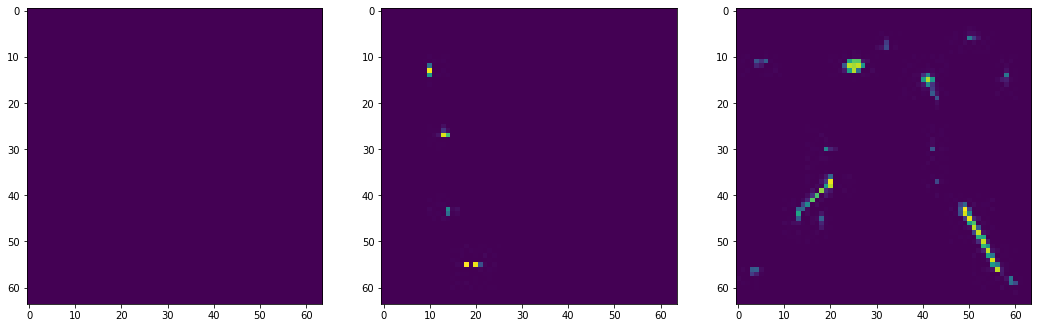

In [43]:
fig, ax = plt.subplots(1,3, figsize = (18,9))
ax[0].imshow(vascus_data[100])
ax[1].imshow(vascus_data[111])
ax[2].imshow(vascus_data[222])


plt.show()

#we take two vaskus images
imgvas1 = vascus_data[111]
imgvas2 = vascus_data[222]

In [100]:
vascus_data.shape

(303, 50, 50)

In [46]:
#get vascus images
SYNTH_IMAGE_LIB = './vascus/synimages/'
all_vascus = [SYNTH_IMAGE_LIB + x for x in sorted(os.listdir(SYNTH_IMAGE_LIB)) if x[-4:] == '.png']

vascus_data = np.empty((len(all_vascus), VASCUS_HEIGHT, VASCUS_WIDTH), dtype='uint8')
for i, name in enumerate(all_vascus):
    im = cv2.imread(name, cv2.IMREAD_UNCHANGED).astype("uint8")
    im = cv2.resize(im, dsize=(VASCUS_WIDTH, VASCUS_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    vascus_data[i] = im
    
    

In [47]:
vascus_data.shape

(297, 64, 64)

In [48]:
import random

#starmap = imgsrc.copy()

h_items = int(IMG_HEIGHT/VASCUS_HEIGHT)
w_items = int(IMG_WIDTH/VASCUS_WIDTH)

#print("h %s, w %s " % (h_items,w_items))

def makeLine():
    vascus_data.shape
    im = random.choice (vascus_data)
    for w in range(0,w_items):
        randomvascus = random.choice (vascus_data)
        im = cv2.hconcat([im, randomvascus])

    return im

Now lets make a "star map" - an image filled of vascus images

In [49]:

def makeStarmap():
    starmap = makeLine()

    for h in range(0,h_items):
        newline = makeLine()
        starmap = cv2.vconcat([starmap, newline])
    return starmap
    



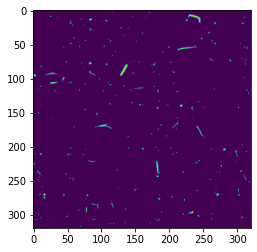

In [50]:
starmap = makeStarmap()
imgplot = plt.imshow(starmap)
plt.show()

Now paint starmap over the image mask

In [73]:

def createDatasetPair(imgsrc,lungmask):

    starmap = makeStarmap()
    
    imgres = imgsrc.copy()
    imgmask = imgsrc.copy()

    for x in range(0,IMG_WIDTH):# process all pixels
        for y in range(0,IMG_HEIGHT):
            #we process only in mask pixels
            if (lungmask[x, y] >= 80 ):
                imgres[x,y]=80
                imgmask[x,y]=0
                #apply starmap image
                if(starmap[x,y] > 80):
                    imgres[x,y]=starmap[x,y]
                    if(imgres[x,y]>150):
                        #make it less bright so it looks more real
                        imgres[x,y]-=50
                    imgmask[x,y]=255
                    
            else:
                imgmask[x,y]=0
    return imgres,imgmask

imgres,imgmask = createDatasetPair(imgsrc,lungmask)
        

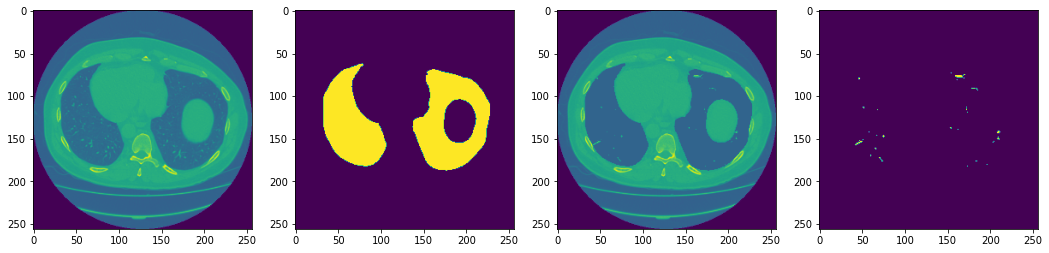

In [74]:
fig, ax = plt.subplots(1,4, figsize = (18,9))
ax[0].imshow(imgsrc)
ax[1].imshow(lungmask)
ax[2].imshow(imgres)
ax[3].imshow(imgmask)


plt.show()


In [53]:
diff = np.max(lungmask) - np.min(lungmask)

In [54]:
diff

255.0

In [55]:
np.max(lungmask)

255.0

In [56]:
np.min(lungmask)

0.0

In [57]:
lungmask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
imgsrc

array([[ 0,  0,  0, ...,  0,  3, 36],
       [ 0,  0,  0, ...,  0,  0,  3],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [59]:
starmap


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [60]:
np.max(starmap)

255

In [61]:
diff = np.max(imgres) - np.min(imgres)
diff

253

=================== FINALLY MAKING THE SYNTHETIC VESSELS SET =====================


In [75]:
import imageio

IMAGE_LIB = './ds_lungseg/images/'
MASK_LIB = './ds_lungseg/masks/'
SYNTH_IMAGE_LIB = './ds_lungseg/synvesimages/'
SYNTH_MASK_LIB = './ds_lungseg/synvesmasks/'
IMG_HEIGHT, IMG_WIDTH = 256, 256

all_images = [x for x in sorted(os.listdir(IMAGE_LIB)) if x[-4:] == '.png']

x_data = np.empty((len(all_images), IMG_HEIGHT, IMG_WIDTH), dtype='uint8')
for i, name in enumerate(all_images):
    im = cv2.imread(IMAGE_LIB + name, cv2.IMREAD_UNCHANGED).astype("uint8")
    #im = cv2.imread(IMAGE_LIB + name, cv2.IMREAD_UNCHANGED).astype('float32')/255.
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    #dont need norm here
    #im = (im - np.min(im)) / (np.max(im) - np.min(im))
    imgsrc = im
    
    im = cv2.imread(MASK_LIB + name, cv2.IMREAD_UNCHANGED).astype('uint8')
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_NEAREST)
    
    diff = np.max(im) - np.min(im)
    if(diff==0):
        print("Image "+name+" skipped since the mask is blank")
        continue
    
    lungmask = im
    
    imgres,imgmask = createDatasetPair(imgsrc,lungmask)
    
    #save every 5-th slice
    if(i % 5 == 0):
        imageio.imwrite(SYNTH_IMAGE_LIB+name, imgres)
        imageio.imwrite(SYNTH_MASK_LIB+name, imgmask)
        print('Saved.')

    

Image P012_z001.png skipped since the mask is blank
Image P012_z002.png skipped since the mask is blank
Image P012_z003.png skipped since the mask is blank
Image P012_z004.png skipped since the mask is blank
Image P012_z005.png skipped since the mask is blank
Image P012_z006.png skipped since the mask is blank
Image P012_z007.png skipped since the mask is blank
Image P012_z008.png skipped since the mask is blank
Image P012_z009.png skipped since the mask is blank
Image P012_z010.png skipped since the mask is blank
Image P012_z011.png skipped since the mask is blank
Image P012_z012.png skipped since the mask is blank
Image P012_z013.png skipped since the mask is blank
Image P012_z014.png skipped since the mask is blank
Image P012_z015.png skipped since the mask is blank
Image P012_z016.png skipped since the mask is blank
Image P012_z017.png skipped since the mask is blank
Image P012_z018.png skipped since the mask is blank
Image P012_z019.png skipped since the mask is blank
Image P012_z

Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Image P019_z408.png skipped since the mask is blank
Image P019_z409.png skipped since the mask is blank
Image P019_z410.png skipped since the mask is blank
Image P019_z411.png skipped since the mask is blank
Image P019_z412.png skipped since the mask is blank
Image P019_z413.png skipped since the mask is blank
Image P019_z414.png skipped since the mask is blank
Image P019_z415.png skipped since the mask is blank
Image P019_z416.png skipped since the mask is blank
Image P019_z417.png skipped since the mask is blank
Image P019_z418.png skipped since the mask is blank
Image P019_z419.png skipped since the mask is blank
Image P019_z420.png skipped since the mask is blank
Image P019_z421.png skipped since the mask is blank
Image P019_z422.png skipped since the mask is blank
Image P019_z423.png skipped since the mask is blank
Image P019_z424.png skipped since the mask is blank
Image P019_z425.png skipped since the mask is blank
I

Image P050_z021.png skipped since the mask is blank
Image P050_z022.png skipped since the mask is blank
Image P050_z023.png skipped since the mask is blank
Image P050_z024.png skipped since the mask is blank
Image P050_z025.png skipped since the mask is blank
Image P050_z026.png skipped since the mask is blank
Image P050_z027.png skipped since the mask is blank
Image P050_z028.png skipped since the mask is blank
Image P050_z029.png skipped since the mask is blank
Image P050_z030.png skipped since the mask is blank
Image P050_z031.png skipped since the mask is blank
Image P050_z032.png skipped since the mask is blank
Image P050_z033.png skipped since the mask is blank
Image P050_z034.png skipped since the mask is blank
Image P050_z035.png skipped since the mask is blank
Image P050_z036.png skipped since the mask is blank
Image P050_z037.png skipped since the mask is blank
Image P050_z038.png skipped since the mask is blank
Image P050_z039.png skipped since the mask is blank
Image P050_z

Image P053_z008.png skipped since the mask is blank
Image P053_z009.png skipped since the mask is blank
Image P053_z010.png skipped since the mask is blank
Image P053_z011.png skipped since the mask is blank
Image P053_z012.png skipped since the mask is blank
Image P053_z013.png skipped since the mask is blank
Image P053_z014.png skipped since the mask is blank
Image P053_z015.png skipped since the mask is blank
Image P053_z016.png skipped since the mask is blank
Image P053_z017.png skipped since the mask is blank
Image P053_z018.png skipped since the mask is blank
Image P053_z019.png skipped since the mask is blank
Image P053_z020.png skipped since the mask is blank
Image P053_z021.png skipped since the mask is blank
Image P053_z022.png skipped since the mask is blank
Image P053_z023.png skipped since the mask is blank
Image P053_z024.png skipped since the mask is blank
Image P053_z025.png skipped since the mask is blank
Image P053_z026.png skipped since the mask is blank
Image P053_z

Image P073_z008.png skipped since the mask is blank
Image P073_z009.png skipped since the mask is blank
Image P073_z010.png skipped since the mask is blank
Image P073_z011.png skipped since the mask is blank
Image P073_z012.png skipped since the mask is blank
Image P073_z013.png skipped since the mask is blank
Image P073_z014.png skipped since the mask is blank
Image P073_z015.png skipped since the mask is blank
Image P073_z016.png skipped since the mask is blank
Image P073_z017.png skipped since the mask is blank
Image P073_z018.png skipped since the mask is blank
Image P073_z019.png skipped since the mask is blank
Image P073_z020.png skipped since the mask is blank
Image P073_z021.png skipped since the mask is blank
Image P073_z022.png skipped since the mask is blank
Image P073_z023.png skipped since the mask is blank
Image P073_z024.png skipped since the mask is blank
Image P073_z025.png skipped since the mask is blank
Image P073_z026.png skipped since the mask is blank
Saved.
Saved

=============== LETS MAKE VALIDATION SET ==============

In [31]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

import imageio
from patchify import patchify, unpatchify

fname="P012_z230_"
fname="P012_z153_"
IMAGE_FILE = './P012/validation/'+fname+'orig.png'
MASK_FILE = './P012/validation/'+fname+'mask.png'



IMAGE_LIB = './P012/validation/images/'
MASK_LIB = './P012/validation/masks/'

IMG_HEIGHT, IMG_WIDTH = 256, 256

#read and resize the image
img = cv2.imread(IMAGE_FILE, cv2.IMREAD_UNCHANGED).astype("uint8")
img = cv2.resize(img, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)

#now lets make patches 64x64
patches_img = patchify(img, (64,64), step=64) # split image into 2*3 small 2*2 patches.

#read and resize the image
msk = cv2.imread(MASK_FILE, cv2.IMREAD_UNCHANGED).astype("uint8")
msk = cv2.resize(msk, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)

#now lets make patches 64x64
patches_msk = patchify(msk, (64,64), step=64) # split image into 2*3 small 2*2 patches.

patches_img.shape

(4, 4, 64, 64)

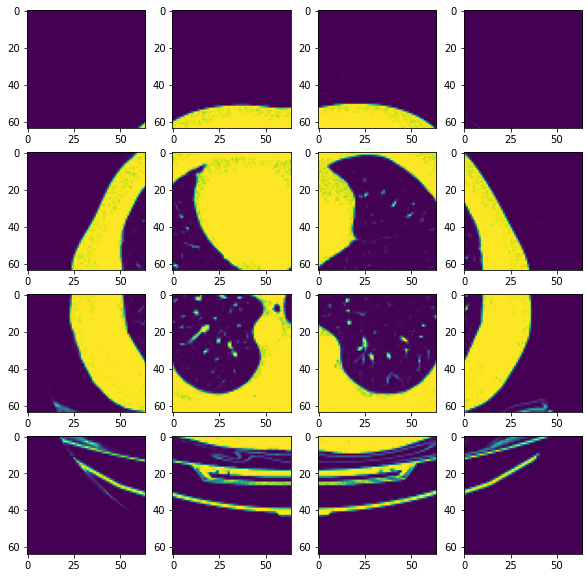

In [32]:
im = patches_img[2,3,]
fix, ax = plt.subplots(4,4, figsize=(10,10))
#plt.axis('off')
#fix.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
for i in range(4):
    for j in range(4):
        im = patches_img[i,j,]  
        ax[i,j].imshow(im)

plt.show()


In [33]:
#save the pathches


for i in range(4):
    for j in range(4):
        img = patches_img[i,j,]  
        msk = patches_msk[i,j,]  
        imageio.imwrite(IMAGE_LIB+fname+str(i)+str(j)+".png", img)
        imageio.imwrite(MASK_LIB+fname+str(i)+str(j)+".png", msk)
        print('Saved.')


Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
Saved.
